In [36]:
import sys
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Algorithms/ImaginedWe')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Algorithms')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import constantNames as NC

from experimentConstruction import *
from consistentSignalChecks_Experiment import SignalIsConsistent_Experiment
from visualizations_Experiment import *
from setupInference_Experiment import SetupExperiment_SignalsSeparated

# Trials as Functions

In [38]:
# Scenario setups
s = (4,0)
r = (4,7)

signalSpace_GC = ['green', 'circle']
signalSpace_PT = ['purple', 'triangle']

targetDict_GtGcPc = {(0,7): 'green triangle', (4,3):'green circle' , (8,7):'purple circle'}
targetDict_GcGtPc = {(0,7): 'green circle', (4,3):'green triangle' , (8,7):'purple circle'}
targetDict_GtPcGc = {(0,7): 'green triangle', (4,3):'purple circle' , (8,7):'green circle'}
targetDict_PcGtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (8,7):'green circle'}

targetDict_PcGtPtGc = {(0,7): 'purple circle', (4,3):'green triangle' , (7,6): 'purple triangle', (8,7):'green circle'}

rationality = 1
reward = 15

gridDims = (9,10)

In [4]:
runInference = SetupExperiment_SignalsSeparated(rationality, reward)

receiver1, signaler1, pragReceiver1 = runInference(s, r, signalSpace_PT, targetDict_GtGcPc)
receiver2, signaler2,pragReceiver2 = runInference(s, r, signalSpace_GC, targetDict_GtGcPc)
receiver3, signaler3, pragReceiver3 = runInference(s, r, signalSpace_GC, targetDict_GcGtPc)

receiver4, signaler4, pragReceiver4 = runInference(s, r, signalSpace_PT, targetDict_PcGtPtGc)


### Setup 1 : Baseline
- All models should be able to solve by consistency
- true target is the green triangle

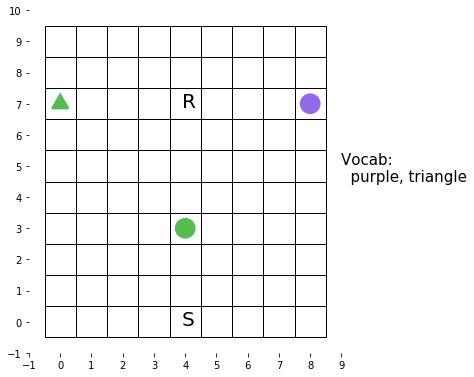

In [5]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_GtGcPc)

In [6]:
setup1Sig = signaler1({'intentions':'green triangle'})
setup1Sig

,probability
signals,
purple,3.056235e-07
triangle,9.990886e-01
green triangle,9.110509e-04


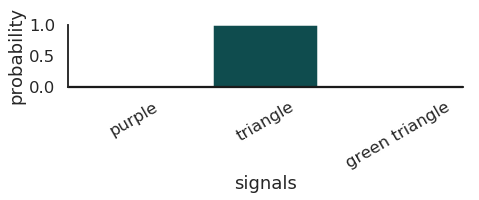

In [8]:
plotSignalerActionDistribution(setup1Sig)

### Sidebar on Stopping Criteria

In [13]:
# Entropy Measure
-sum(setup1Sig['probability']*np.log(setup1Sig['probability']))
setup1Sig['uniform'] = 1.0
setup1Sig['uniform'] = setup1Sig['uniform']/sum(setup1Sig['uniform'])
maximumEntropy = -sum(setup1Sig['uniform']*np.log(setup1Sig['uniform']))
# minimum entropy is 0

In [14]:
rec1 = receiver1('triangle')
rec1.loc[rec1['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green triangle,1.0


In [15]:
prec1 = pragReceiver1('triangle')
prec1.loc[prec1['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green triangle,1.0


In [16]:
receiver1('purple').loc[receiver1('purple')['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (8, 7))",1,1,purple circle,1.0


/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment/visualizations_Experiment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  originalReceiverDF['receiver'] = originalReceiverDF.groupby(originalReceiverDF.index.names).apply(getReceiverAction)


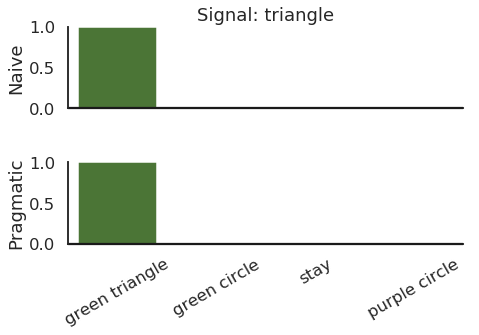

In [17]:
plotReceiverActionDistributions(naiveReceiverDataframe=rec1, 
                               pragmaticReceiverDataframe=prec1,
                               locationDictionary=targetDict_GtGcPc,
                               receiverLocInaction=r, signal = 'triangle')

### Setup 2: Utility reasoning is not enough
- RSA should solve whereas utility calculus cannot
- true target is the purple circle

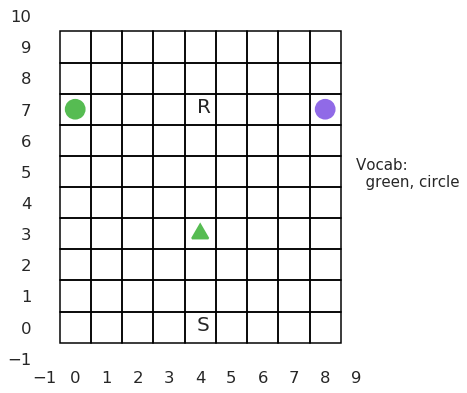

In [18]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [19]:
setup2Sig = signaler3({'intentions':'purple circle'})
setup2Sig

,probability
signals,
circle,0.880762
green,0.000040
purple circle,0.119198


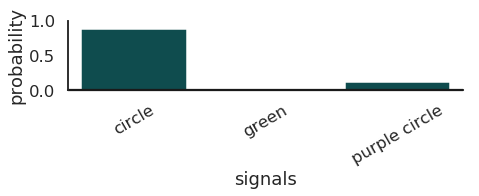

In [20]:
plotSignalerActionDistribution(setup2Sig)

In [40]:
rec2 = receiver3('circle')
nonZeroRec2 = rec2.loc[rec2['p(mind|signal)'] > .00001]
nonZeroRec2

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green circle,0.333333
"((4, 0), (8, 7))",1,1,purple circle,0.666666


In [22]:
prec2 = pragReceiver3('circle')
prec2.loc[prec2['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green circle,0.008500
"((4, 0), (8, 7))",1,1,purple circle,0.991499


/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment/visualizations_Experiment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  originalReceiverDF['receiver'] = originalReceiverDF.groupby(originalReceiverDF.index.names).apply(getReceiverAction)


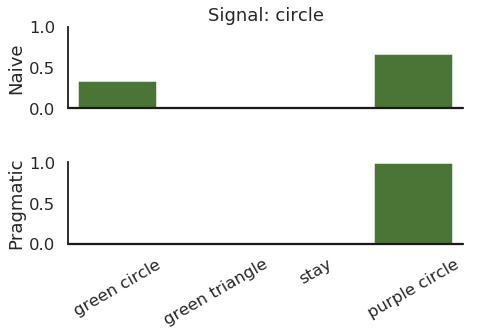

In [23]:
plotReceiverActionDistributions(naiveReceiverDataframe=rec2, 
                               pragmaticReceiverDataframe=prec2,
                               locationDictionary=targetDict_GcGtPc,
                               receiverLocInaction=r, signal='circle')

### Setup 3: RSA Reasoning is not enough
- RSA cannot solve but joint utility calculus can
- true target is the green circle

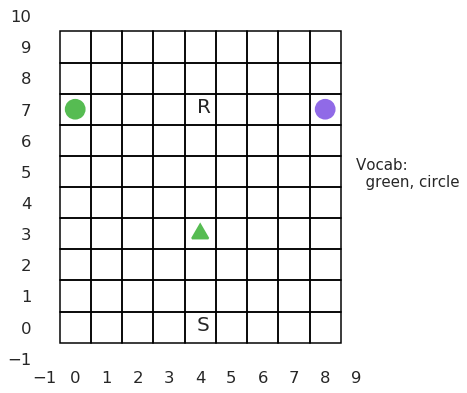

In [24]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_GC, targetDict_GcGtPc)

In [25]:
setup3Sig = signaler3({'intentions':'green circle'})
setup3Sig

,probability
signals,
circle,0.007314
green,0.845791
green circle,0.146895


In [26]:
rec3 = receiver3('green')
rec3.loc[rec3['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green circle,0.650037
"((4, 0), (4, 3))",1,1,green triangle,0.349963


In [27]:
prec3 = pragReceiver3('green')
prec3.loc[prec3['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,green circle,0.787341
"((4, 0), (4, 3))",1,1,green triangle,0.212658


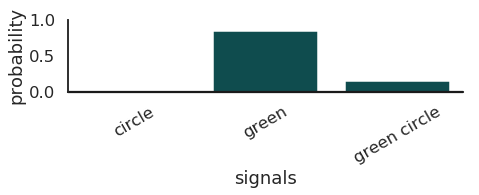

In [28]:
plotSignalerActionDistribution(setup3Sig)

/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment/visualizations_Experiment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  originalReceiverDF['receiver'] = originalReceiverDF.groupby(originalReceiverDF.index.names).apply(getReceiverAction)


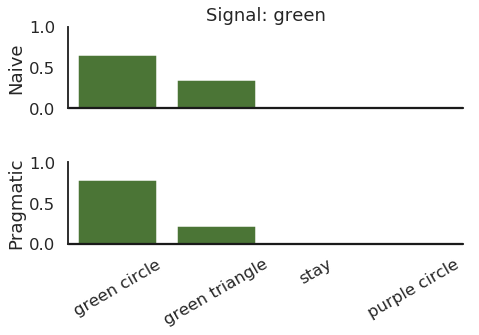

In [29]:
plotReceiverActionDistributions(naiveReceiverDataframe=rec3, 
                               pragmaticReceiverDataframe=prec3,
                               locationDictionary=targetDict_GcGtPc,
                               receiverLocInaction=r, signal='green')

### Setup 4: Neither mechanism alone is enough
- Only IW can solve because it requires both utlity reasoning and pragmatics to solve
- true target is the purple circle

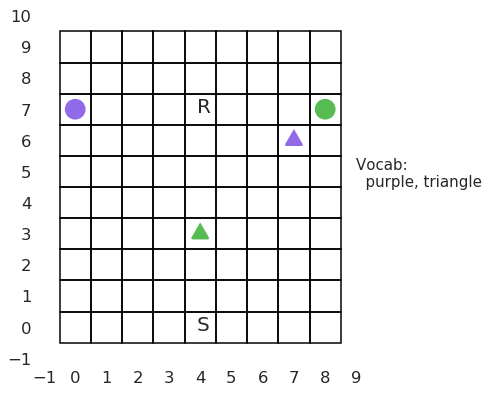

In [30]:
visualizeExperimentTrial(gridDims, s, r, signalSpace_PT, targetDict_PcGtPtGc) 

In [31]:
setup4Sig = signaler4({'intentions':'purple circle'})
setup4Sig

,probability
signals,
purple,0.882777
triangle,0.000039
purple circle,0.117184


In [32]:
rec4 = receiver4('purple')
rec4.loc[rec4['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,purple circle,0.667955
"((4, 0), (7, 6))",1,1,purple triangle,0.332045


In [33]:
prec4 = pragReceiver4('purple')
prec4.loc[prec4['p(mind|signal)'] > .001]

,,,,p(mind|signal)
actions,desires,worlds,intentions,
"((4, 0), (0, 7))",1,1,purple circle,0.991544
"((4, 0), (7, 6))",1,1,purple triangle,0.008456


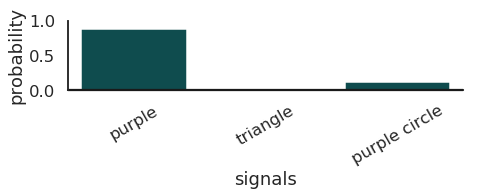

In [34]:
plotSignalerActionDistribution(setup4Sig)

/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Experiment/visualizations_Experiment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  originalReceiverDF['receiver'] = originalReceiverDF.groupby(originalReceiverDF.index.names).apply(getReceiverAction)


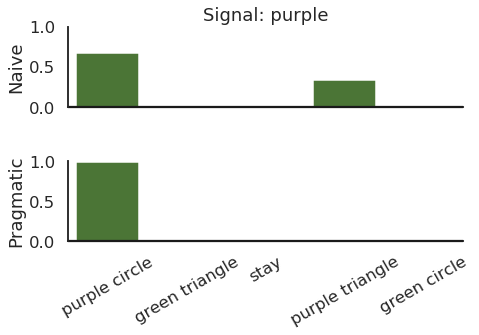

In [35]:
plotReceiverActionDistributions(naiveReceiverDataframe=rec4, 
                               pragmaticReceiverDataframe=prec4,
                               locationDictionary=targetDict_PcGtPtGc,
                               receiverLocInaction=r, signal='purple')
